# **AP155 Lab Assignment** 
## Module 5: Ordinary Differential Equations

_Instructions_: Answer each problem as completely as you can. Discuss **all** your answers as clearly and concisely as possible. 

_Scoring Criteria_: 50% - *correctness of code*; 50% - *discussion of the code and results*. Maximum score is **100 points** (Problems 1 to 3 are worth 25, 25, and 50 points, respectively).

_Due Date_: **5PM of December 7 (Tue)**


### Student Information 

_Full Name (Last Name, First Name)_: Andeo, Lovely \
_Student No._: 2020-05405\
_Section_: HX4

### Submission Information

_Date and Time Submitted (most recent upload)_: 

**HONOR PLEDGE** I affirm that I have upheld the highest principles of honesty and integrity in my academic work and that this lab assignment is my own work.

**Sign here with your full name: Lovely Andeo** 

### Grading Information (c/o Lab Instructor)

TOTAL SCORE: **[]**/100

Score breakdown:
* Problem 1 - []/25
* Problem 2 - []/25
* Problem 3 - []/50

_Date and Time Scored (MM/DD/YYYY HH:MM AM/PM):_ 

### PROBLEM 1 (25 pts.; 50/50 for code & discussion) 
**The Lotka-Volterra equations**

_Refer to Exercise 8.2 in the Newman text._ The Lotka-Volterra equations are a mathematical model of predator-prey interactions between biological species. Let two variables $x$ and $y$ be proportional to the size of the populations of two species, traditionally called "rabbits" (the prey) and "foxes" (the predators). You could think of $x$ and $y$ as being the population in thousands, say, so that $x = 2$ means there are 2000 rabbits. 

In the Lotka-Volterra model the rabbits reproduce at a rate proportional to their population, but are eaten by the foxes at a rate proportional to both their own population and the population of foxes:

$$\frac{{\rm d}x}{{\rm d}t} = \alpha x - \beta xy,$$

where $\alpha$ and $\beta$ are constants. At the same time the foxes reproduce at a rate proportional to the rate at which they eat rabbits-- because they need food to grow and reproduce-- but also die of old age at a rate proportional to their own population:

$$\frac{{\rm d}y}{{\rm d}t}  = \gamma xy - \delta y,$$

where $\gamma$ and $\delta$ are also constants. *(15 pts.)*

1. Solve these equations using the fourth-order Runge-Kutta method for the case $\alpha = 1, \beta = \gamma = 0.5$, and $\delta = 2$, starting from the initial condition $x = y = 2$. 

2. Make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$. *(10 pts.)*

**Solution**

As usual, we import all the necessary packages and libraries for this problem.

In [85]:
import numpy as np
from numpy import array, arange, pi, sqrt
from math import sin
import matplotlib.pyplot as plt

**1.1** Solving this problem using the fourth-order Runge-Kutta method, we first define the constants. Note that the ODEs with variables $x$ and $y$ are now expressed in vector form of **$r$**. Next is, we define $r$ with the initial conditions $x=y=2$. Then, we define the ODEs given in the problem which corresponds to the rate at which the predator and preys reproduce and die. 

In [86]:
# Defining the constant paramaters
alpha = 1 
beta = 0.5 
gamma = 0.5 
delta = 2

# Defining r with the initial conditions
r = array([2, 2], float) 

# Defining a function corressponding to the equations given 
def f(r, t):
    x = r[0] 
    y = r[1]
    fx = alpha * x - beta * x * y # Predator - foxes
    fy = gamma * x * y - delta * y # Prey - rabbits
    return array([fx, fy], float)


Performing the Runge-Kutta method, we first determine $h$ from the given steps and interval. Then, we initialize the values that will be calculated and use a for loop to get the solutions using the general equations for 4th-order Runge Kutta method. We also don't forget to append the first values of $r$ as the $x$ values and the second as the $y$ values, since those will be the values that we will plot.

In [87]:
# Defining the interval and steps
a = 0
b = 30
N = 1000
h = (b - a) / N

# Initializing the values that we want to calculate
tpoints = arange(a, b, h)
ypoints = []
xpoints = []

# Performing the for loop
for t in tpoints:
    xpoints.append(r[0])  # Appending values for the foxes
    ypoints.append(r[1])  # Appending values for the rabbits

    # General equations for RK4
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)


**1.2** To make a graph showing both $x$ and $y$ as a function of time on the same axes from $t =0$ to $t = 30$, we use the matplotlib package that was previously imported.

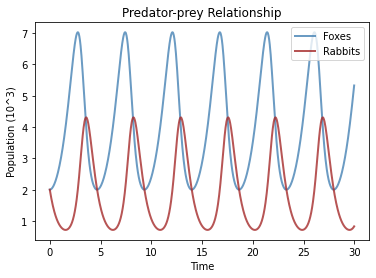

In [88]:
# Plotting x as a function of time
plt.plot(tpoints, xpoints, color = 'steelblue', label = 'Foxes', linewidth = 2, alpha=0.8)

# Plotting y as a function of time
plt.plot(tpoints, ypoints, color = 'brown', label = 'Rabbits', linewidth = 2, alpha=0.8 )

# Customizing the plot with labels and legends
plt.title('Predator-prey Relationship')
plt.xlabel("Time")
plt.ylabel("Population (10^3)")
plt.legend()

# Displaying the plot
plt.show()

From the graph, we can see that at $t=0$, the population of the rabbits decreases as that of the foxes increases, since the more rabbits the foxes eat, the more they'll reproduce. But eventually, as the number of rabbits decrease, the less food there will be for the foxes leading some to a possibility of starving and dying. But we can also notice that population of rabbits peak when there are relatively less foxes, since there will be less prey to haunt them.

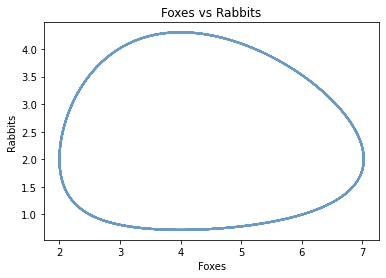

In [89]:
# Plotting the population of the rabbits against foxes
plt.plot(xpoints, ypoints, color = 'steelblue', linewidth = 2, alpha=0.8)

# Customizing the plot with labels and legends
plt.title('Foxes vs Rabbits')
plt.xlabel("Foxes")
plt.ylabel("Rabbits")

# Displaying the plot
plt.show()

This graph is just to show the correlation between the population of the rabbits against that of the foxes, which evidently shows the increasing and decresing cycle of both species.

### PROBLEM 2 (25 pts.; 50/50 for code & discussion)

**Nonlinear pendulum**

_Refer to Exercise 8.4 in the Newman text._ Building on the results from Example 8.6, calculate the motion of a nonlinear pendulum as follows.

1. Solve the two first-order equations, Eqs. (8.45) and (8.46), using the fourth-order Runge-Kutta method for a pendulum with a 10 cm arm. Use your program to calculate the angle $\theta$ of displacement for several periods of the pendulum when it is released from a standstill at $\theta = 179^\circ$ from the vertical. *(15 pts.)*

2. Make a graph of $\theta$ as a function of time. *(10 pts.)*


**Solution**

**2.1** Equations 8.45 and 8.46 are given by 
$$\dfrac{d\theta}{dt} = \omega, \ \ \dfrac{d\omega}{dt} = -\dfrac{g}{l}\sin \theta$$

Now, we again combine the two variables into a single vector  as such
$$\bold{r} = (\theta, \omega)$$
then we apply the fourth-order Runge-Kutta method.

Next is to define the givens constants involved in the problem: the value of the accelaration due to gravity $g$ and the length $l$ of the pendulum's arm. To also make sure that we are working with the same units, we convert $l$ from cm to m.

In [90]:
# Defining the given values
l = 0.1  # Unit is m
g = 9.81  # Unit is m/s^2

Then again, the variables $\theta$ and $\omega$ are now expressed in vector form of **$r$**. Initialize the values that will be calculated and then apply the initial conditions to define the vector $r$ in which for this problem is the angle from a standstill, $\theta = 179^\circ$. And define the function with the vector $r$ and the ODEs given. 

In [91]:
# Defining r with the initial angle from a standstill
w = 179*(pi/180) # converting to radians
r = array([w, 0], float) 

# Defining a function corressponding to the equations given 
def f(r, t):
    theta = r[0]
    omega = r[1]

    # The equations 8.45 and 8.46
    ftheta = omega
    fomega = (-g/l)* sin(theta)
    return array([ftheta, fomega], float)

Using the Runge-Kutta method, we first determine $h$ from the given steps and interval. Next, a for loop will be performed to get the solutions using the general equations for 4th-order Runge Kutta method. We can also just append the first values of $r$ as the $x$ or theta values and disregard the values for $\omega$ since we're only concerned of $\theta$.

In [92]:
# Defining the interval and steps
a = 0
b = 10
N = 1000
h = (b - a) / N

# Initializing the values that we want to calculate
tpoints = arange(a, b, h)
theta_points = []

for t in tpoints:
    # Appending only the theta values 
    theta_points.append(r[0]) 
    
    # General equations for RK4
    k1 = h * f(r, t)
    k2 = h * f(r + 0.5 * k1, t + 0.5 * h)
    k3 = h * f(r + 0.5 * k2, t + 0.5 * h)
    k4 = h * f(r + k3, t + h)
    r += 1/6 * (k1 + 2 * k2 + 2 * k3 + k4)

**2.2** Finally, our task is to graph $\theta$ as a function of time wherein from the values we got, tpoint corresponds to time and theta_points correspoints to the angle of displacement, theta.

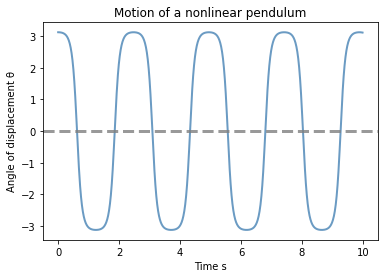

In [93]:
# Plotting θ as a function of time
plt.plot(tpoints, theta_points, color = 'steelblue', label = 'Foxes', linewidth = 2, alpha=0.8)

# Adding a line at x = 0
plt.axhline([0], color='gray', linewidth=3, linestyle = 'dashed', alpha=0.8) 

# Customizing the plot with labels
plt.title('Motion of a nonlinear pendulum')
plt.xlabel("Time s")
plt.ylabel("Angle of displacement θ")

# Displaying the plot
plt.show()

From the graph, it shows that the pendulum oscillates relative to time. Usually for a nonlinear pendulum, its speed and acceleration is very small that it forms platforms like the ones shown in the graph (unlike that of the linear pendulum whose phase trajectory is an ellipse).

### PROBLEM 3 (50 pts.; 50/50 for code & discussion)

**Quantum Oscillators**

_Refer to Exercise 8.14 of the Newman text_ Consider the one-dimensional, time-independent Schrodinger equation in a harmonic (i.e., quadratic) potential $V(x) = V_0 x^2 / a^2$, where $V_0$ and $a$ are constants. 

1. Modify the code from Example 8.9 to find the energies of the ground state and the first two excited states for this potential when $m$ is the electron mass, $V_0 = 50$ eV, and $a = 10^{-11}$ m. Note that in theory the wavefunction goes all the way out to $x = \pm \infty$, but you can get good answers by using a large but finite interval. Try using $x = - 10a$ to $+10a$, with the wavefunction $\psi = 0$ at both boundaries. (In effect, you are putting the harmonic oscillator in a box with impenetrable walls.) The wavefunction is real everywhere, so you don't need to use complex variables, and you can use evenly spaced points for the solution-- there is no need to use an adaptive method for this problem.

   The quantum harmonic oscillator is known to have energy states that are equally spaced. Check that this is true, to the precision of your calculation, for your answers. (Hint: The ground state has energy in the range 100 to 200eV.) *(20 pts.)*

2. Modify the code from (1) to calculate the same three energies for the anharmonic oscillator with $V(x) = V_0 x^4 /a^4$, with the same parameter values. *(10 pts.)*

3. Calculate the properly normalized wavefunctions of the anharmonic oscillator for the three states. To normalize the wavefunctions you will have to calculate the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ and then rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1. Either the trapezoidal rule or Simpson's rule will give you a reasonable value for the integral. *(15 pts.)*

   Note that you may find a few very large values at the end of the array holding the wavefunction. Where do these large values come from? Are they real, or spurious? One simple way to deal with the large values is to make use of the fact that the system is symmetric about its midpoint and calculate the integral of the wavefunction over only the left-hand half of the system, then double the result. This neatly misses out the large values. 

4. Make a plot of the normalized wavefunctions from (3), all on the same axes, as a function of $x$ over a modest range near the origin-- say $x = -5a$ to $x =+5a$. *(5 pts.)*



**Solution**

**3.1** First is to modify the code in Example 8.9 to solve for energies of the ground state and the first two excited states of a harmonic oscillator with the potential given by
$$V(x) = V_0 x^2 / a^2,$$

a range of $x = - 10a$ to $+10a$, $V_0 = 50$ eV, and $a = 10^{-11}$. 

First is we define and change the constants from the original code in the book that was used to calculate the ground state energy in a square well. Then we define the equation of the harmonic potential. We will also be using the Runge-Kutta method to solve for a particular energy (note that there will be an additional E in the argument).

In [99]:
# Defining the constants
m = 9.1094e-31 # Mass of electron
hbar = 1.0546e-34 # Planck's constant over 2*pi 
e = 1.6022e-19 # Electron charge
x1 = -10*a
x2 = 10*a
N = 1000 
h = (x2-x1)/N
VO = 50*e 
a = 1e-11

# Defining the equation of the harmonic potential
def V(x): 
    return VO*x**2/a**2

def f(r,x,E): 
    psi=r[0] 
    phi=r[1]
    fpsi = phi 
    fphi = (2*m/hbar**2)*(V(x)-E)*psi 
    return np.array([fpsi,fphi] ,float) 

def solve(E):
    psi=0.0
    phi=1.0
    r=np.array([psi,phi],float)

# Calculate the wavefunction psi for a particular energy
def solve(E):
    psi=0.0
    phi=1.0
    r=np.array([psi,phi],float)
    for x in np.arange(x1,x2,h): 
        # RK4 equations
        k1=h*f(r,x,E) 
        k2=h*f(r+0.5*k1,x+0.5*h,E) 
        k3=h*f(r+0.5*k2,x+0.5*h,E) 
        k4=h*f(r+k3,x+h,E) 
        r+=(k1+2*k2+2*k3+k4)/6
    return r[0]


Then we calculate for the energies of the first 3 excited states using the Secant method.

In [100]:
# Finding the ground state energy using the secant method
E1=0.0 
E2=e 
psi2=solve(E1) 
target=e/1000 
while abs(E1-E2)>target: 
    psi1,psi2=psi2,solve(E2) 
    E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)

GS = E2/e
print("Ground state =" ,E2/e, "eV")

# Finding the first excited state energy using the same method
E1 = 140 * e
E2 = 300 * e
psi2=solve(E1) 
target=e/1000 
while abs(E1-E2)>target: 
    psi1,psi2=psi2,solve(E2) 
    E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)
FS = E2/e 
print("First excited state =" ,E2/e, "eV")

# Finding the second excited state energy using the same method
E1 = 415 * e
E2 = 700 * e
psi2=solve(E1) 
target=e/1000 
while abs(E1-E2)>target: 
    psi1,psi2=psi2,solve(E2) 
    E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)
SS = E2/e 
print("Second excited state =" ,E2/e, "eV")

Ground state = 138.02397130603683 eV
First excited state = 414.07191654124284 eV
Second excited state = 690.1198621104223 eV


**3.2** Using the same parameter values, we now calculate the same three energies for the anharmonic oscillator with the potential of
$$V(x) = V_0 x^4 /a^4$$

In [101]:
# Defining the constants
m = 9.1094e-31 # Mass of electron
hbar = 1.0546e-34 # Planck's constant over 2*pi 
e = 1.6022e-19 # Electron charge
a = 1e-11
x1 = -10*a
x2 = 10*a
N = 1000 
h = (x2-x1)/N
VO = 50*e 

# Defining the equation of the anharmonic oscillator
def V(x): 
    return VO*x**4/a**4

def f(r,x,E): 
    psi=r[0] 
    phi=r[1]
    fpsi = phi 
    fphi = (2*m/hbar**2)*(V(x)-E)*psi 
    return np.array([fpsi,fphi] ,float) 

# Calculate the wavefunction for a particular energy def solve(E):
def solve(E):
    psi=0.0
    phi=1.0
    r=np.array([psi,phi],float)
    for x in np.arange(x1,x2,h): 
        k1=h*f(r,x,E) 
        k2=h*f(r+0.5*k1,x+0.5*h,E) 
        k3=h*f(r+0.5*k2,x+0.5*h,E) 
        k4=h*f(r+k3,x+h,E) 
        r+=(k1+2*k2+2*k3+k4)/6
    return r[0]

# Finding the energy of the anharmonic oscillator using the secant method
E1=0.0 
E2=e 
psi2=solve(E1) 
target=e/1000 
while abs(E1-E2)>target: 
    psi1,psi2=psi2,solve(E2) 
    E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)

GS = E2/e

# Finding the first excited state of the anharmonic oscillator using the same method
E1 = 0 * e
E2 = 800 * e
psi2=solve(E1) 
target=e/1000 
while abs(E1-E2)>target: 
    psi1,psi2=psi2,solve(E2) 
    E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)

FS = E2/e

# Finding the second excited state of the anharmonic oscillator using the same method
E1 = 750 * e
E2 = 1500 * e
psi2=solve(E1) 
target=e/1000 
while abs(E1-E2)>target: 
    psi1,psi2=psi2,solve(E2) 
    E1,E2=E2,E2-psi2*(E2-E1)/(psi2-psi1)

SS = E2/e

**3.3** Given a new range, we first calculate the wavefunctions for three states of an anharmonic oscillator. Then solve for the value of the integral $\int_{-\infty}^{+\infty} |\psi(x)|^2 {\rm d}x$ to properly normalize the wavefunctions. And lastly rescale $\psi$ appropriately to ensure that the area under the square of each of the wavefunctions is 1.

In [102]:
# Redefining the range
a = 1e-11
x1 = -5 * a
x2 = 5 * a
N = 1000
h = (x2-x1)/N

# Initiating the t points or x
t_points = np.arange(x1,x2,h)

# Defining the equation of the anharmonic oscillator
def V(x): 
    return VO*x**4/a**4

def f(r,x,E): 
    psi=r[0] 
    phi=r[1]
    fpsi = phi 
    fphi = (2*m/hbar**2)*(V(x)-E)*psi 
    return np.array([fpsi,fphi] ,float) 

# Calculating the wavefunction for a particular energy
def solve_psi(E):
    x_points = []
    y_points = []

    psi=0.0
    phi=1.0
    r=np.array([psi,phi],float)

    for x in t_points: 
        x_points.append(r[0])
        y_points.append(r[1])
        k1=h*f(r,x,E) 
        k2=h*f(r+0.5*k1,x+0.5*h,E) 
        k3=h*f(r+0.5*k2,x+0.5*h,E) 
        k4=h*f(r+k3,x+h,E) 
        r+=(k1+2*k2+2*k3+k4)/6
        
    t = np.array(t_points)
    x = np.array(x_points)
    return x    

# Initiating an array for the bound states of the anharmonic oscillator
anhar = np.array([GS, FS, SS])

# Solving the wavefunctions of the three states
g_psi = np.array(solve_psi(anhar[0] * e))
f_psi = np.array(solve_psi(anhar[1] * e))
s_psi = np.array(solve_psi(anhar[2] * e))

Next is we normalize the wavefunctions calculated using Simpson's rule. Then we rescale the wavefunctions.

In [103]:
# Using simpson's rule to estimate the value of the integral
def simp(psi):
    I_1, I_2 = 0,0
    I = 0
    for k in range(1, len(psi), 2):
        I_1 += psi[k]
    for k in range(2,N,2):
        I_2 += psi[k]
    
    I = (1/3)*(4*I_1 + 2*I_2)
    return I

# Getting the normalized wavefunctions of anhar
N0 = np.sqrt(1/simp(g_psi ** 2))
N1 = np.sqrt(1/simp(f_psi ** 2))
N2 = np.sqrt(1/simp(s_psi ** 2))

# Rescaling the wavefunctions
psi_norm = N0 * g_psi
psi1_norm = N1 * f_psi
psi2_norm = N2 * s_psi

**3.4** Finally, we plot each of the normalized wavefunctions on the same axis as a function of $x$ over a modest range near the origin.

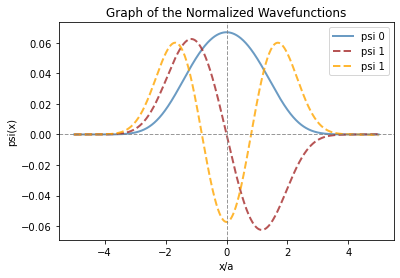

In [105]:
# Defining the values of the x-axis over the given range
x_val = t_points / a

# Plotting the normalized wavefunctions
plt.plot(x_val, psi_norm, color = 'steelblue', label = 'psi 0', linewidth = 2, alpha=0.8)
plt.plot(x_val, psi1_norm, color = 'brown', label = 'psi 1', linestyle = "--", linewidth = 2, alpha=0.8)
plt.plot(x_val, psi2_norm, color = 'orange', label = 'psi 1', linestyle = "--", linewidth = 2, alpha=0.8)


# Adding lines at 0
plt.axhline([0], color='gray', linewidth=1, linestyle = 'dashed', alpha=0.8) 
plt.axvline([0], color='gray', linewidth=1, linestyle = 'dashed', alpha=0.8) 

# Customizing the plot with labels
plt.title('Graph of the Normalized Wavefunctions')
plt.xlabel("x/a")
plt.ylabel("psi(x)")

# Displaying the plot
plt.legend()
plt.show()


The graph basically shows the probability density of the oscillator at different energy states. We can see that the normalized wavefunctions for the ground state energy is centered at the minimum showing a symmetric potential. Accordingly, the first and second excited states also are symmetrical along $x = 0$ but has more complex shapes than the ground state.